# <center> Ejercicios de series de tiempo 

## 1. Predecir la ocurrencia de pasajeros en una linea de vuelos 

### Paso 1: Cargar Packges y Set de datos



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import numpy as np 
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline 

# Establecer la precisión de los valores de punto flotante
pd.set_option('display.precision', 2)

datos = pd.read_csv('airline-passengers.csv', parse_dates=['Month'], index_col='Month')
datos.head(15)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


## Paso 2: Selección de los datos donde se realizará el análisis 

In [2]:
datos['1949':'1960']['Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

## Paso 3: Determinación del tipo de modelo (Estacionario o no Estacionario)
 

In [6]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Calcular la media móvil y la desviación estándar móvil con ventana de 12 períodos
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Graficar la serie original, la media móvil y la desviación estándar móvil
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Media Móvil')
    plt.plot(rolstd, color='yellow', label='Desviación Estándar')
    
    plt.legend(loc='best')
    plt.title('Media Móvil y Desviación Estándar')


```python
from statsmodels.tsa.stattools import adfuller
```
En esta línea, se importa la función adfuller de la librería statsmodels.tsa.stattools. Esta función se utiliza para realizar la prueba de Dickey-Fuller aumentada (ADF), que es una prueba estadística común para verificar la estacionariedad de una serie de tiempo.

```python
def test_stationarity(timeseries):
    ```
Se define una función llamada test_stationarity que toma un argumento timeseries, que se espera que sea una serie de tiempo. Esta función se utilizará para realizar el análisis de estacionariedad en la serie de tiempo proporcionada.

```python
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
```
Dentro de la función test_stationarity, se calculan la media móvil y la desviación estándar móvil de la serie de tiempo (timeseries) utilizando una ventana de tamaño 12. La función pd.rolling_mean se utiliza para calcular la media móvil y pd.rolling_std para la desviación estándar móvil.

```python
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Media Móvil')
    std = plt.plot(rolstd, color='yellow', label='Desviación Estándar')
```
Se crean tres líneas de gráfico utilizando la función plt.plot(). La primera línea representa la serie de tiempo original en color azul, la segunda línea representa la media móvil calculada en color rojo y la tercera línea representa la desviación estándar móvil en color amarillo. Etiquetas (labels) también se asignan a cada línea para la leyenda.

```python
    plt.legend(loc='best')
    plt.title('Media Móvil y Desviación Estándar')
    plt.show(block=False)
```
En estas líneas, se configura la leyenda para que aparezca en la "mejor" ubicación (basado en la disposición del gráfico), se agrega un título al gráfico y finalmente se muestra el gráfico utilizando plt.show(block=False). La opción block=False permite que el proceso continúe sin bloquear la ejecución después de mostrar el gráfico.

```python
test_stationarity(datos['Passengers'])
```
Aquí se llama a la función test_stationarity pasando la columna 'Passengers' de la variable datos como argumento. Esto ejecutará todo el análisis y gráficos definidos en la función para esta serie de tiempo en particular.

Este código en conjunto realiza un análisis de estacionariedad en una serie de tiempo y grafica las estadísticas de balanceo para ayudar a evaluar si la serie de tiempo es estacionaria o no.

## Paso 4: Calculo de la media móvil 



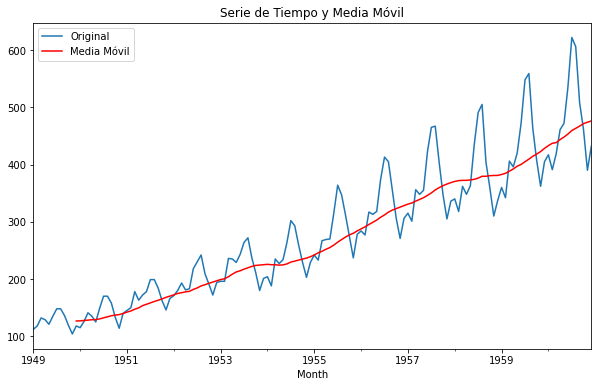

In [7]:
# Calcular la media móvil con una ventana de 12 meses
moving_avg = datos['Passengers'].rolling(window=12).mean()

# Graficar la serie original y la media móvil
plt.figure(figsize=(10, 6))
datos['Passengers'].plot(label='Original')
moving_avg.plot(label='Media Móvil', color='red')
plt.title('Serie de Tiempo y Media Móvil')
plt.legend(loc='best')
plt.show()

## Paso 5: Cálculo de la varianza 


Text(0.5, 1.0, 'Varianza diaria')

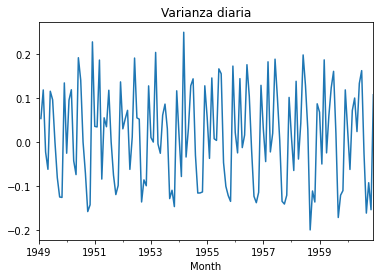

In [8]:
variacion_diaria = datos['Passengers'] / datos['Passengers'].shift(1) - 1 
datos['var_diaria'] = variacion_diaria
datos['var_diaria'][:5]
#Gráfica de la varianza 
plot = datos['var_diaria'].plot()
plt.title('Varianza diaria')

# Paso 6: Cálculo de la linea de tendencia sobre los datos 


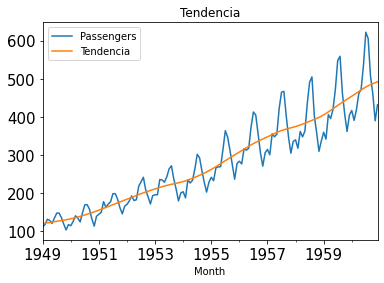

In [9]:
# Gráfica de tendencia aplicando el filtro de Hadrick-Prescott 
ciclo, tend = sm.tsa.filters.hpfilter(datos['Passengers']) # Aplica el filtro 
datos['Tendencia'] = tend 
datos[['Passengers', 'Tendencia']].plot(fontsize= 15)
plt.title('Tendencia')
legend = plt.legend()
legend.prop.set_size(14);


# Paso 7: Descomposición de los componentes de la serie de tiempo 


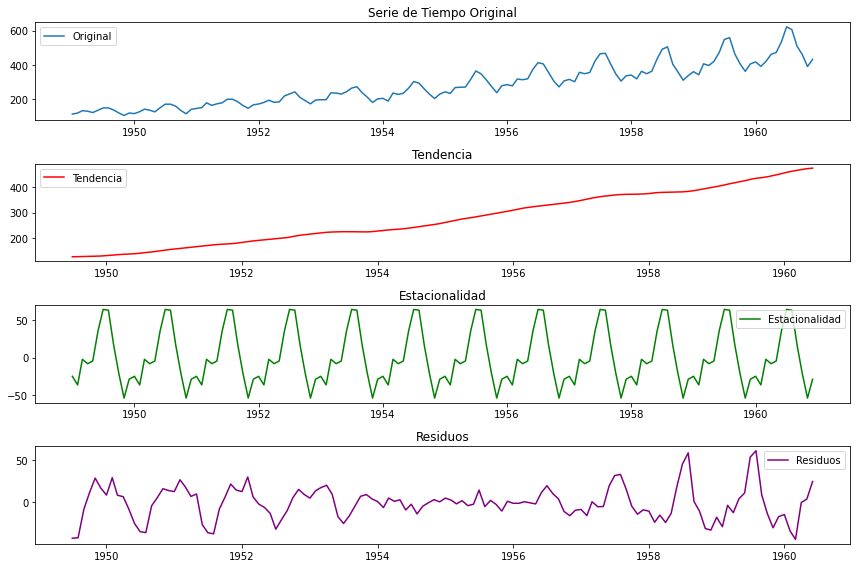

In [12]:

# Descomposición de la serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(datos['Passengers'], period=12)  # Usamos 12 como ejemplo de período

trend = descomposicion.trend
seasonal = descomposicion.seasonal
residual = descomposicion.resid

# Graficar los componentes de la descomposición
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(datos['Passengers'], label='Original')
plt.legend(loc='best')
plt.title('Serie de Tiempo Original')

plt.subplot(412)
plt.plot(trend, label='Tendencia', color='red')
plt.legend(loc='best')
plt.title('Tendencia')

plt.subplot(413)
plt.plot(seasonal,label='Estacionalidad', color='green')
plt.legend(loc='best')
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(residual, label='Residuos', color='purple')
plt.legend(loc='best')
plt.title('Residuos')

plt.tight_layout()
plt.show()
